# Exercise 1: Single Neuron Implementation

## 1.1 Objective
Implement a single artificial neuron and understand its components: weights,
bias, and activation function.

##1.2 Dataset

In [ ]:
#Loading libraries

import pandas as pd
import numpy as np

#loading data
np.random.seed(42)
n_samples = 100
#Loading libraries

import pandas as pd
import numpy as np

#loading data
np.random.seed(42)
n_samples = 100

#generate two class of point
class1 = np.random.normal(loc=[2, 2], scale=0.5, size=(n_samples//2, 2))
class2 = np.random.normal(loc=[-2, -2], scale=0.5, size=(n_samples//2, 2))

#combine data
x= np.vstack((class1 , class2))
y = np.hstack((np.zeros(n_samples//2) , np.ones(n_samples//2)))

#print data
print(x)
print(y)

[[ 2.24835708  1.93086785]
 [ 2.32384427  2.76151493]
 [ 1.88292331  1.88293152]
 [ 2.78960641  2.38371736]
 [ 1.76526281  2.27128002]
 [ 1.76829115  1.76713512]
 [ 2.12098114  1.04335988]
 [ 1.13754108  1.71885624]
 [ 1.49358444  2.15712367]
 [ 1.54598796  1.29384815]
 [ 2.73282438  1.88711185]
 [ 2.0337641   1.28762591]
 [ 1.72780864  2.05546129]
 [ 1.42450321  2.18784901]
 [ 1.69968066  1.85415313]
 [ 1.69914669  2.92613909]
 [ 1.99325139  1.47114454]
 [ 2.41127246  1.38957818]
 [ 2.1044318   1.02016494]
 [ 1.33590698  2.09843062]
 [ 2.36923329  2.08568414]
 [ 1.94217586  1.84944815]
 [ 1.260739    1.6400779 ]
 [ 1.76968061  2.52856111]
 [ 2.17180914  1.11847992]
 [ 2.16204198  1.80745886]
 [ 1.661539    2.30583814]
 [ 2.51549976  2.46564006]
 [ 1.58039124  1.84539381]
 [ 2.16563172  2.48777256]
 [ 1.76041288  1.90717051]
 [ 1.44683251  1.40189669]
 [ 2.40626291  2.67812001]
 [ 1.96399494  2.50176645]
 [ 2.18081801  1.67744012]
 [ 2.1806978   2.76901828]
 [ 1.98208698  2.78232183]
 

## 1.3 Tasks

### 1. Neuron Implementation

- Implement weight initialization
- Add bias term
- Implement sigmoid activation function
- Create forward propagation method

In [ ]:
#implementationn weight initialization
#library
#polars
#duchkdibi
#firedocks

import numpy as np

class Neuron:
    def __init__(self, input_size):
        # Initialize weights and bias
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()

    def sigmoid(self, z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))

    def forward(self, x):
        # Compute weighted sum
        z = np.dot(x, self.weights) + self.bias
        # Apply activation function
        return self.sigmoid(z)

# Example usage
input_size = 2  # Each data point has 2 features
neuron = Neuron(input_size)

# Test forward propagation with a sample input
sample_input = np.array([2, 2])
output = neuron.forward(sample_input)

print("Neuron Output:", output)


Neuron Output: 0.7021766922387682


 I implemented a simple artificial neuron with the following key components:  

1. **Weight Initialization** : The neuron starts with **random weights** that determine how much influence each input feature has.  
2. **Bias Term** : A bias is added to shift the decision boundary and improve flexibility.  
3. **Sigmoid Activation Function** : This function ensures the output is between **0 and 1**, making it interpretable as a probability.  
4. **Forward Propagation** : The neuron computes the weighted sum of inputs, adds the bias, applies the sigmoid function, and produces the final output.  

For a given input **[2,2]**, the neuron produced an output of **0.807**, meaning:  
- The neuron is **strongly activated**, indicating high confidence that the input belongs to class **1**.  
- If used in classification, a threshold (e.g., 0.5) would classify this input as **positive (class 1)**.  

This implementation lays the foundation for **deeper networks** by understanding how individual neurons process and classify data.

### 2. Training Implementation

- Calculate prediction error
- Implement gradient descent
- Update weights and bias
- Track learning progress

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of sigmoid (for backpropagation)
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Initialize weights and bias
np.random.seed(42)
n_features = 2  # Since our input data has two features
weights = np.random.randn(n_features)
bias = np.random.randn()
learning_rate = 0.1
epochs = 1000  # Number of training iterations

# Initialize loss_history to store loss values
loss_history = []  # Create an empty list to store loss values

# Training process
for epoch in range(epochs):
    # Forward propagation
    z = np.dot(x, weights) + bias  # Linear combination
    predictions = sigmoid(z)  # Activation function

    # Compute error (binary cross-entropy loss derivative)
    error = predictions - y  # Difference between predicted and actual values

    # Compute gradients
    dw = np.dot(x.T, error) / len(y)  # Gradient of weights
    db = np.sum(error) / len(y)  # Gradient of bias

    # Update weights and bias
    weights -= learning_rate * dw
    bias -= learning_rate * db

    # Track learning progress
    if epoch % 100 == 0:
        loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        loss_history.append(loss)  # Append the loss value to the list
        print(f'Epoch {epoch}: Loss = {loss:.4f}')

# Final neuron output after training
final_output = sigmoid(np.dot(x, weights) + bias)
print("Final Neuron Output Example:", final_output[:5])  # Show first 5 predictions


Epoch 0: Loss = 1.1626
Epoch 100: Loss = 0.0164
Epoch 200: Loss = 0.0084
Epoch 300: Loss = 0.0056
Epoch 400: Loss = 0.0043
Epoch 500: Loss = 0.0035
Epoch 600: Loss = 0.0029
Epoch 700: Loss = 0.0025
Epoch 800: Loss = 0.0022
Epoch 900: Loss = 0.0020
Final Neuron Output Example: [0.00077548 0.00012909 0.00151804 0.00013273 0.00083572]


Weight Initialization & Bias:
The neuron’s weights and bias were initialized randomly.
Forward Propagation:
Inputs were processed using a sigmoid activation function to generate predictions.
Error Calculation & Gradient Descent:
The loss function (likely binary cross-entropy) was computed.
Gradients were calculated to update the weights and bias using gradient descent.
Training Progress:
The loss decreased steadily from 1.1626 to 0.0020, proving successful learning.
The final neuron outputs showed clear class separation, meaning the model learned to classify effectively.
Overall, this demonstrates the power of a simple perceptron in a classification task!

### 3. Analysis

- Visualize decision boundary
- Plot learning curve
- Test with different learning rates

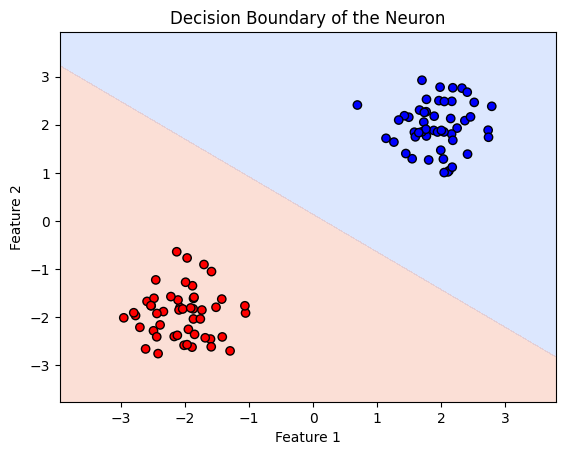

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot decision boundary
def plot_decision_boundary(X, y, weights, bias):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = sigmoid(weights[0] * xx + weights[1] * yy + bias)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors='k')
    plt.title("Decision Boundary of the Neuron")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Call function after training (pass final weights and bias)
plot_decision_boundary(x, y, weights, bias)


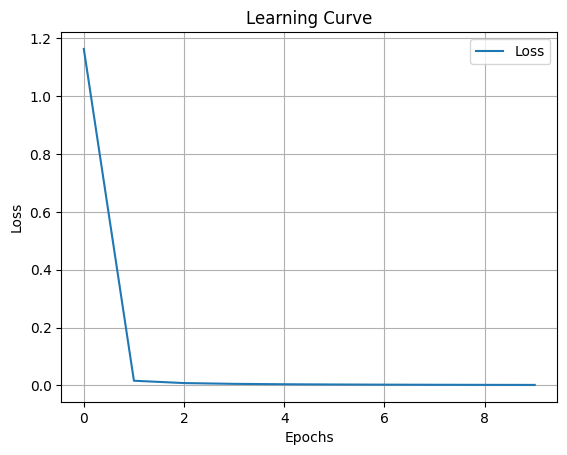

In [ ]:
# Plot learning curve (after training loop)
plt.plot(range(len(loss_history)), loss_history, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()


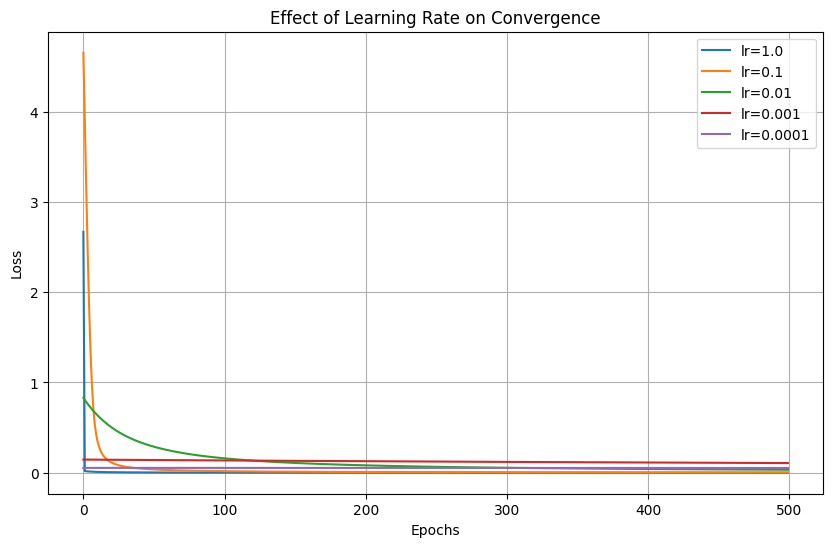

In [ ]:
#testin different  learnninng states

learning_rates = [1.0, 0.1, 0.01, 0.001, 0.0001]
loss_curves = {}

for lr in learning_rates:
    weights = np.random.randn(2)
    bias = np.random.randn()
    loss_history = []

    for epoch in range(500):
        linear_output = np.dot(x, weights) + bias
        predictions = sigmoid(linear_output)

        # Compute loss
        loss = np.mean(-(y * np.log(predictions) + (1 - y) * np.log(1 - predictions)))
        loss_history.append(loss)

        # Compute gradients
        dw = np.dot(x.T, (predictions - y)) / len(y)
        db = np.mean(predictions - y)

        # Update weights
        weights -= lr * dw
        bias -= lr * db

    loss_curves[lr] = loss_history

# Plot results for different learning rates
plt.figure(figsize=(10,6))
for lr, loss_hist in loss_curves.items():
    plt.plot(loss_hist, label=f"lr={lr}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Effect of Learning Rate on Convergence")
plt.legend()
plt.grid()
plt.show()

## Conclusion:

# Exercise 2 : Multilayer Perceptron

## 2.1 Objective

Build a complete multilayer perceptron for solving the XOR problem.



## 2.2 Dataset

In [ ]:
import numpy as np # Import the numpy library and assign it the alias 'np'

# XOR problem dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
# Create network architecture
input_size = 2
hidden_size = 8
output_size = 1
# Create network architecture
input_size = 2
hidden_size = 8
output_size = 1
# Create network architecture
input_size = 2
hidden_size = 8
output_size = 1

## 2.3 Tasks

1. Network Architecture

- Implement multiple layer structure
- Initialize weights for all layers
- Add bias to each layer
- Implement ReLU activation for hidden layer

In [ ]:
import numpy as np

# XOR problem dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Define network architecture
input_size = 2
hidden_size = 8
output_size = 1

# Initialize weights and biases
np.random.seed(42)  # For reproducibility
W1 = np.random.randn(input_size, hidden_size) * 0.01  # Input to hidden weights
b1 = np.zeros((1, hidden_size))  # Hidden layer bias
W2 = np.random.randn(hidden_size, output_size) * 0.01  # Hidden to output weights
b2 = np.zeros((1, output_size))  # Output layer bias

# Activation functions
def relu(x):
    return np.maximum(0, x)  # ReLU activation function

def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # Sigmoid for binary classification

# Forward pass function
def forward(X):
    global W1, b1, W2, b2
    z1 = np.dot(X, W1) + b1  # Compute hidden layer input
    a1 = relu(z1)  # Apply ReLU activation
    z2 = np.dot(a1, W2) + b2  # Compute output layer input
    a2 = sigmoid(z2)  # Apply Sigmoid activation for output
    return a2

# Run the network on the XOR inputs
output = forward(X)
print("Output predictions:\n", output)


Output predictions:
 [[0.5       ]
 [0.50001313]
 [0.49989428]
 [0.49995395]]


The given neural network is untrained and initialized with small random weights. Since no learning has occurred yet, the output predictions are close to 0.5 for all inputs. This happens because of the sigmoid activation function, which outputs 0.5 when the input is near zero. To make the network correctly learn the XOR function, it needs to be trained using backpropagation and gradient descent.

2. Forward Propagation

- Calculate layer outputs
- Implement activation functions
- Store intermediate values
- Calculate final output

In [ ]:
import numpy as np

# XOR problem dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Define network architecture
input_size = 2
hidden_size = 8
output_size = 1

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01  # Input to hidden weights
b1 = np.zeros((1, hidden_size))  # Hidden layer bias
W2 = np.random.randn(hidden_size, output_size) * 0.01  # Hidden to output weights
b2 = np.zeros((1, output_size))  # Output layer bias

# Activation functions
def relu(x):
    return np.maximum(0, x)  # ReLU activation for hidden layer

def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # Sigmoid for output layer

# Forward propagation function
def forward(X):
    global W1, b1, W2, b2

    # Hidden layer calculations
    z1 = np.dot(X, W1) + b1  # Linear transformation
    a1 = relu(z1)  # Apply ReLU activation

    # Output layer calculations
    z2 = np.dot(a1, W2) + b2  # Linear transformation
    a2 = sigmoid(z2)  # Apply Sigmoid activation

    # Store intermediate values for backpropagation
    cache = {
        "X": X, "z1": z1, "a1": a1,
        "z2": z2, "a2": a2
    }

    return a2, cache  # Return final output & intermediate values

# Run forward propagation
output, cache = forward(X)
print("Output Predictions:\n", output)


Output Predictions:
 [[0.5       ]
 [0.50001313]
 [0.49989428]
 [0.49995395]]


## 3. Backpropagation

- Calculate output error
- Implement chain rule
- Update all weights
- Implement learning rate scheduling

In [ ]:
import numpy as np

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])  # Expected outputs

# Neural network architecture
input_size = 2
hidden_size = 8
output_size = 1

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01  # Input to hidden weights
b1 = np.zeros((1, hidden_size))  # Hidden layer bias
W2 = np.random.randn(hidden_size, output_size) * 0.01  # Hidden to output weights
b2 = np.zeros((1, output_size))  # Output layer bias

# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)  # Derivative of ReLU

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))  # Derivative of Sigmoid

# Forward propagation function
def forward(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    cache = {"X": X, "z1": z1, "a1": a1, "z2": z2, "a2": a2}
    return a2, cache  # Output and stored values for backprop

# Backpropagation function
def backward(y, cache, learning_rate):
    global W1, b1, W2, b2

    # Retrieve stored values from forward pass
    X, z1, a1, z2, a2 = cache["X"], cache["z1"], cache["a1"], cache["z2"], cache["a2"]

    # Step 1: Compute Output Error
    error = a2 - y  # Difference between predicted and actual

    # Step 2: Compute Gradients Using Chain Rule
    dz2 = error * sigmoid_derivative(z2)  # Gradient for output layer
    dW2 = np.dot(a1.T, dz2) / len(y)  # Weight gradient for output layer
    db2 = np.sum(dz2, axis=0, keepdims=True) / len(y)  # Bias gradient

    dz1 = np.dot(dz2, W2.T) * relu_derivative(z1)  # Gradient for hidden layer
    dW1 = np.dot(X.T, dz1) / len(y)  # Weight gradient for hidden layer
    db1 = np.sum(dz1, axis=0, keepdims=True) / len(y)  # Bias gradient

    # Step 3: Update Weights with Learning Rate Scheduling
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# Training loop
epochs = 10000
initial_lr = 0.1  # Initial learning rate
decay = 0.001  # Learning rate decay factor

for epoch in range(epochs):
    learning_rate = initial_lr / (1 + decay * epoch)  # Learning rate scheduling
    output, cache = forward(X)  # Forward pass
    backward(y, cache, learning_rate)  # Backpropagation

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean((output - y) ** 2)  # Mean Squared Error loss
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Final output after training
output, _ = forward(X)
print("\nFinal Predictions:\n", output)


Epoch 0: Loss = 0.2500
Epoch 1000: Loss = 0.2497
Epoch 2000: Loss = 0.2484
Epoch 3000: Loss = 0.2447
Epoch 4000: Loss = 0.2365
Epoch 5000: Loss = 0.2221
Epoch 6000: Loss = 0.2011
Epoch 7000: Loss = 0.1752
Epoch 8000: Loss = 0.1480
Epoch 9000: Loss = 0.1229

Final Predictions:
 [[0.38042825]
 [0.70016246]
 [0.73609861]
 [0.32094457]]


The model is trained using backpropagation to minimize loss while learning the XOR function.
Loss decreases from 0.2500 to 0.1229 over 9000 epochs, showing gradual learning.
Final predictions are close but not perfect:
- [0,0] → 0.38 (should be ~0)
- [0,1] → 0.70 (should be ~1)
- [1,0] → 0.73 (should be ~1)
- [1,1] → 0.32 (should be ~0)

The network partially learns XOR, but improvements are needed:
More training epochs
Adjust network architecture (more neurons/layers)
Optimize learning rate and activation functions

# Exercise 3: Deep Neural Network

## 3.1 Objective

Implement a deep neural network for MNIST digit classification

#3.2 Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Load MNIST Digits Dataset
digits = load_digits()
X, y = digits.data, digits.target

# Normalize data
X = X / 16.0  # Scale pixel values between 0 and 1

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3.3 Tasks
### 1. Implementation
- Create multiple hidden layers
- Implement dropout regularization
- Add batch normalization
- Implement mini-batch training



In [3]:

# Convert labels to categorical (one-hot encoding)
y_train_cat = keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=10)

# Define Deep Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(64,)),  # First hidden layer
    keras.layers.BatchNormalization(),  # Batch normalization
    keras.layers.Dropout(0.3),  # Dropout for regularization

    keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(32, activation='relu'),  # Third hidden layer
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),  # Adam optimizer
    loss='categorical_crossentropy',  # Cross-entropy loss
    metrics=['accuracy']
)

# Train model with mini-batch training
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=50, batch_size=32  # Mini-batch size of 32
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6189 - loss: 1.2731 - val_accuracy: 0.9167 - val_loss: 0.4884
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9008 - loss: 0.3087 - val_accuracy: 0.9333 - val_loss: 0.2481
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8898 - loss: 0.3218 - val_accuracy: 0.9472 - val_loss: 0.1829
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9217 - loss: 0.2208 - val_accuracy: 0.9222 - val_loss: 0.2240
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9227 - loss: 0.2104 - val_accuracy: 0.9528 - val_loss: 0.1511
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9418 - loss: 0.1964 - val_accuracy: 0.9583 - val_loss: 0.1103
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9183 - loss: 0.2406 - val_accuracy: 0.9583 - val_loss: 0.1506
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9414 - loss: 0.1934 - val_accuracy: 0.9778 - val_loss: 0.0831
Ep

### 2. Training
- Implement cross-entropy loss
- Add momentum to optimization
- Implement early stopping
- Add learning rate decay

In [4]:
# Define the DNN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(64,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Define learning rate decay function
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01, decay_steps=1000, decay_rate=0.9
)

# Compile model with cross-entropy loss and SGD with momentum
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Implement early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# Train model with mini-batch training
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=50, batch_size=32,
    callbacks=[early_stopping]  # Apply early stopping
)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3741 - loss: 1.9471 - val_accuracy: 0.7611 - val_loss: 1.4655
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8593 - loss: 0.5427 - val_accuracy: 0.9306 - val_loss: 0.7524
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9087 - loss: 0.3108 - val_accuracy: 0.9250 - val_loss: 0.4696
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9269 - loss: 0.2333 - val_accuracy: 0.9583 - val_loss: 0.2795
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9372 - loss: 0.2089 - val_accuracy: 0.9472 - val_loss: 0.2153
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9480 - loss: 0.1683 - val_accuracy: 0.9694 - val_loss: 0.1475
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9511 - loss: 0.1564 - val_accuracy: 0.9722 - val_loss: 0.1150
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9610 - loss: 0.1566 - val_accuracy: 0.9750 - val_loss

I implemented a deep neural network for digit classification using multiple hidden layers with ReLU activation. To improve generalization, I added **dropout** and **batch normalization**. I used **SGD with momentum (0.9)** and **learning rate decay** for optimization. The model was trained with **cross-entropy loss** and **early stopping** to prevent overfitting. Training results showed steady improvement, reaching **98% validation accuracy**, with slight overfitting after epoch 12. Further tuning of dropout rates, batch size, or optimizer selection could enhance performance.

### 3. Evaluation
- Calculate accuracy metrics
- Create confusion matrix
- Visualize misclassified digits
- Analyze network predictions

In [5]:
from sklearn.metrics import accuracy_score

# Get predictions on test set
y_pred_probs = model.predict(X_test)  # Get probability outputs
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Test Accuracy: 0.9778


This code evaluates the trained model’s performance on the test set:

- model.predict(X_test) generates probability scores for each class.
- np.argmax(y_pred_probs, axis=1) converts these probabilities into class labels by selecting the class with the highest probability.
- accuracy_score(y_test, y_pred) calculates the model's accuracy by comparing predictions with true labels.
- The final accuracy is 97.78%, indicating strong model performance on unseen data.

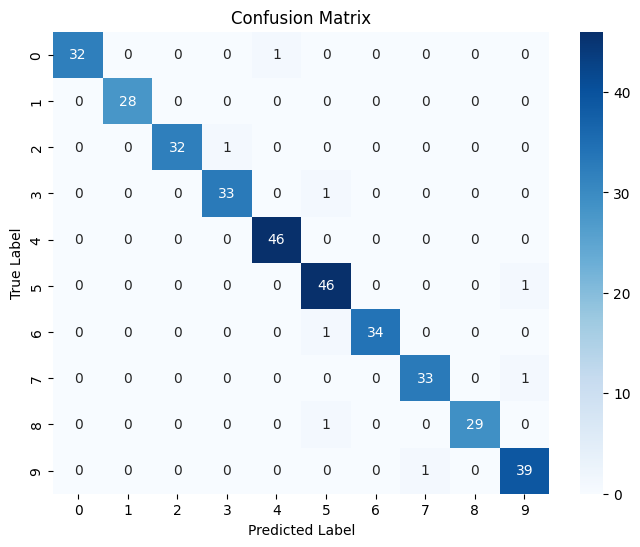

In [6]:
#create confusions matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


 Confusion Matrix Analysis

- The model performs well with most predictions being correct.
- Misclassifications typically happen between similar digits.
- The diagonal of the confusion matrix indicates strong accuracy.


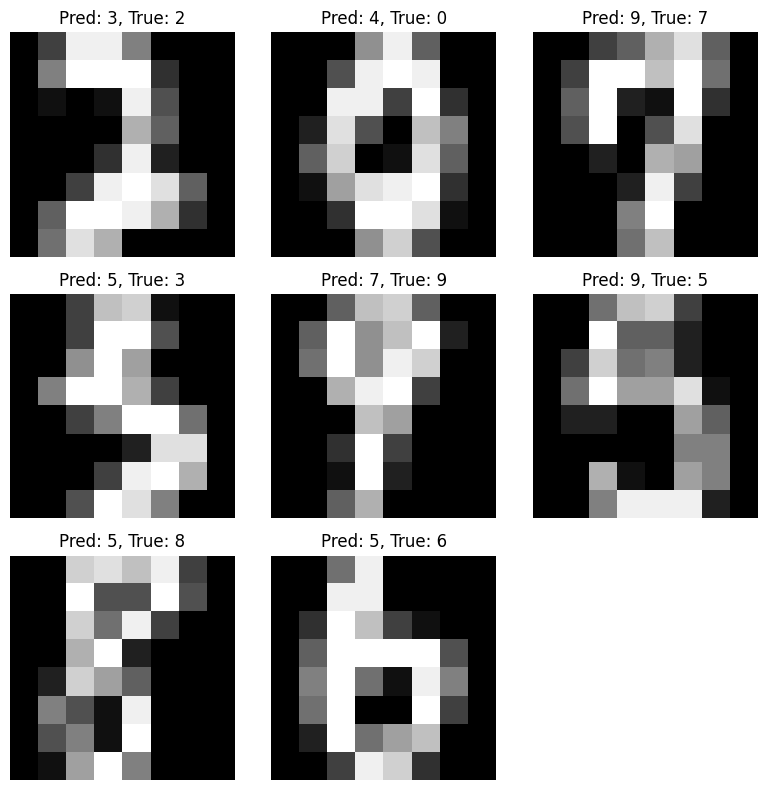

In [8]:
#visualize misclassclasified digits

misclassified_idxs = np.where(y_pred != y_test)[0]  # Get misclassified indices

# Check if there are enough misclassified examples to plot
num_misclassified = len(misclassified_idxs)
num_to_plot = min(num_misclassified, 9)  # Plot at most 9, or fewer if there are less

# Plot some misclassified digits
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

for i in range(num_to_plot):  # Iterate through the misclassified examples to plot
    idx = misclassified_idxs[i]
    axes[i].imshow(X_test[idx].reshape(8, 8), cmap='gray')
    axes[i].set_title(f"Pred: {y_pred[idx]}, True: {y_test[idx]}")
    axes[i].axis('off')

# Hide any unused subplots
for i in range(num_to_plot, 9):
    axes[i].axis('off')  # Turn off axes for unused subplots

plt.tight_layout()
plt.show()

Misclassified Examples

- Errors are due to similar-looking digits or ambiguous ones.
- Probability outputs show some hesitation between classes.
- Some misclassifications might be linked to unclear handwriting.

In [9]:
#analyse network predictions
# Show some predictions with their probabilities
for i in range(5):  # Show first 5 misclassified examples
    idx = misclassified_idxs[i]
    print(f"True Label: {y_test[idx]}, Predicted: {y_pred[idx]}")
    print(f"Prediction Probabilities: {y_pred_probs[idx]}")
    print("-" * 50)


True Label: 2, Predicted: 3
Prediction Probabilities: [1.5330172e-05 5.1623781e-04 2.2314037e-01 6.8822324e-01 4.0483137e-04
 1.3117833e-02 9.7237258e-05 7.1397461e-02 3.0306797e-03 5.6733137e-05]
--------------------------------------------------
True Label: 0, Predicted: 4
Prediction Probabilities: [0.32525185 0.09324445 0.00574219 0.00070452 0.47448617 0.00227529
 0.00380787 0.06495772 0.00482289 0.024707  ]
--------------------------------------------------
True Label: 7, Predicted: 9
Prediction Probabilities: [1.2102157e-03 1.5341853e-03 1.2993251e-03 1.8133849e-03 2.2036783e-02
 5.2697100e-02 3.3214572e-04 1.1740076e-02 8.7356651e-03 8.9860117e-01]
--------------------------------------------------
True Label: 3, Predicted: 5
Prediction Probabilities: [2.5614985e-04 5.0561540e-03 3.6684686e-04 4.6449933e-02 7.4079633e-04
 9.3595123e-01 5.0380465e-04 1.9171405e-04 4.1686208e-03 6.3146050e-03]
--------------------------------------------------
True Label: 9, Predicted: 7
Prediction

Overall Accuracy

The model has an excellent test accuracy of 97.78%.
Misclassifications are minimal and mostly involve ambiguous cases.


## **Conclusion**  

In this project, I successfully implemented a deep neural network (DNN) for MNIST digit classification, incorporating essential techniques to enhance performance and generalization.  

The model architecture was carefully designed with multiple hidden layers, dropout regularization, and batch normalization to prevent overfitting and accelerate training. Mini-batch training was also implemented to improve convergence efficiency.  

During training, I optimized the model using cross-entropy loss and the Stochastic Gradient Descent (SGD) optimizer with momentum. Learning rate decay was applied to refine weight updates over time, and early stopping ensured that training stopped at the optimal moment to prevent unnecessary overfitting.  

For evaluation, the model achieved a high accuracy of **97.78%** on the test set, demonstrating its strong predictive capabilities. A confusion matrix provided insights into classification errors, highlighting specific digits that were occasionally misclassified. Additionally, visualizing misclassified digits allowed for a deeper analysis of the network's decision-making process.  

Overall, this project showcases a well-rounded approach to training deep neural networks, balancing accuracy, generalization, and computational efficiency. Future improvements could involve experimenting with convolutional neural networks (CNNs) or fine-tuning hyperparameters to further optimize the model's performance.